# Importing Libraries

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Loading the Data

In [2]:
data = pd.read_csv('/content/starcraft_player_data.csv')

# DATA PRE-PROCESSING

In [3]:
data.head().  # displaying first few rows of the data

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


In [4]:
data.info(). # checking null values and datatype of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GameID                3395 non-null   int64  
 1   LeagueIndex           3395 non-null   int64  
 2   Age                   3395 non-null   object 
 3   HoursPerWeek          3395 non-null   object 
 4   TotalHours            3395 non-null   object 
 5   APM                   3395 non-null   float64
 6   SelectByHotkeys       3395 non-null   float64
 7   AssignToHotkeys       3395 non-null   float64
 8   UniqueHotkeys         3395 non-null   int64  
 9   MinimapAttacks        3395 non-null   float64
 10  MinimapRightClicks    3395 non-null   float64
 11  NumberOfPACs          3395 non-null   float64
 12  GapBetweenPACs        3395 non-null   float64
 13  ActionLatency         3395 non-null   float64
 14  ActionsInPAC          3395 non-null   float64
 15  TotalMapExplored     

In [5]:
data.describe(). #checking the min, max, std and other statistics of columns

,GameID,LeagueIndex,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000
mean,4805.012371,4.184094,117.046947,0.004299,0.000374,4.364654,0.000098,0.000387,0.003463,40.361562,63.739403,5.272988,22.131664,0.001032,6.534021,0.000059,0.000142
std,2719.944851,1.517327,51.945291,0.005284,0.000225,2.360333,0.000166,0.000377,0.000992,17.153570,19.238869,1.494835,7.431719,0.000519,1.857697,0.000111,0.000265
min,52.000000,1.000000,22.059600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,6.666700,24.093600,2.038900,5.000000,0.000077,2.000000,0.000000,0.000000
25%,2464.500000,3.000000,79.900200,0.001258,0.000204,3.000000,0.000000,0.000140,0.002754,28.957750,50.446600,4.272850,17.000000,0.000683,5.000000,0.000000,0.000000
50%,4874.000000,4.000000,108.010200,0.002500,0.000353,4.000000,0.000040,0.000281,0.003395,36.723500,60.931800,5.095500,22.000000,0.000905,6.000000,0.000000,0.000020
75%,7108.500000,5.000000,142.790400,0.005133,0.000499,6.000000,0.000119,0.000514,0.004027,48.290500,73.681300,6.033600,27.000000,0.001259,8.000000,0.000086,0.000181
max,10095.000000,8.000000,389.831400,0.043088,0.001752,10.000000,0.003019,0.004041,0.007971,237.142900,176.372100,18.558100,58.000000,0.005149,13.000000,0.000902,0.003084


In [98]:
data['LeagueIndex'].value_counts().  # checking the frquency of unique values in a column

4    811
5    806
6    621
3    553
2    347
1    167
8     55
7     35
Name: LeagueIndex, dtype: int64

In [7]:
# replacing '?' with NA
data1 = data
data1['HoursPerWeek'] = data['HoursPerWeek'].replace('?', pd.NA)
data1['Age'] = data['Age'].replace('?', pd.NA)
data1['TotalHours'] = data['TotalHours'].replace('?', pd.NA)

In [10]:
# converting these columns into numeric
data1['HoursPerWeek'] = pd.to_numeric(data1['HoursPerWeek'])
data1['Age'] = pd.to_numeric(data1['Age'])
data1['TotalHours'] = pd.to_numeric(data1['TotalHours'])

In [11]:
# calculating the mean
mean_hours_per_week = data1['HoursPerWeek'].mean()
mean_total_hours = data1['TotalHours'].mean()

In [12]:
# replacing '?' with the mean and mode (depending on the distribution of the values)
data1['HoursPerWeek'] = data1['HoursPerWeek'].fillna(mean_hours_per_week)
data1['Age'] = data1['Age'].fillna(data1['Age'].mode()[0])
data1['TotalHours'] = data1['TotalHours'].fillna(mean_total_hours)

In [13]:
# converting datatype to int
data1['HoursPerWeek'] = data1['HoursPerWeek'].astype(int)
data1['Age'] = data1['Age'].astype(int)
data1['TotalHours'] = data1['TotalHours'].astype(int)

In [15]:
#data1['HoursPerWeek'].value_counts()
data1.dtypes

GameID                    int64
LeagueIndex               int64
Age                       int64
HoursPerWeek              int64
TotalHours                int64
APM                     float64
SelectByHotkeys         float64
AssignToHotkeys         float64
UniqueHotkeys             int64
MinimapAttacks          float64
MinimapRightClicks      float64
NumberOfPACs            float64
GapBetweenPACs          float64
ActionLatency           float64
ActionsInPAC            float64
TotalMapExplored          int64
WorkersMade             float64
UniqueUnitsMade           int64
ComplexUnitsMade        float64
ComplexAbilitiesUsed    float64
dtype: object

## PLOTS FOR EDA

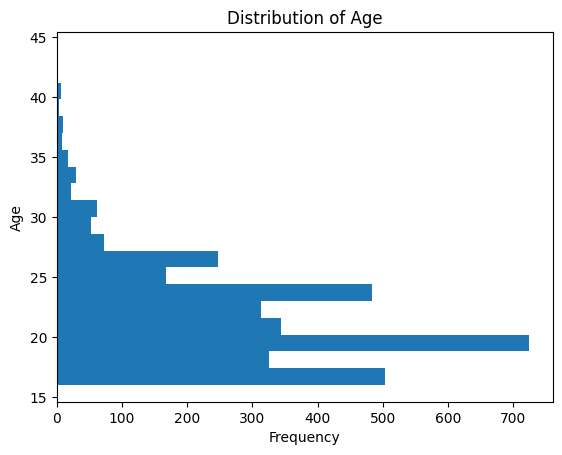

In [125]:
# checking the distribution of age
plt.hist(data1['Age'], bins=20, orientation='horizontal')
plt.xlabel('Frequency')
plt.ylabel('Age')
plt.title('Distribution of Age')
plt.show()

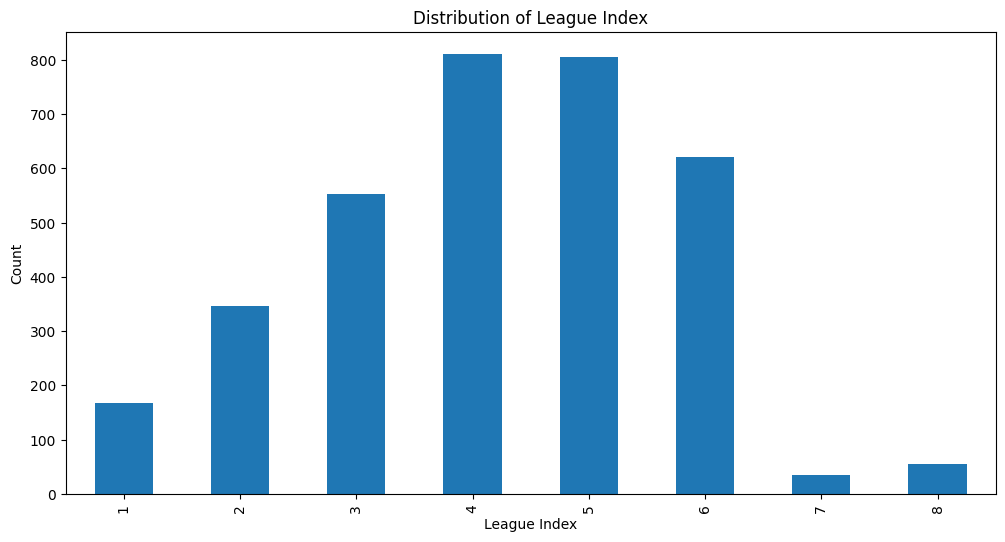

In [126]:
# checking the distribution of League Index
plt.figure(figsize=(12, 6))
data1['LeagueIndex'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('League Index')
plt.ylabel('Count')
plt.title('Distribution of League Index')
plt.show()

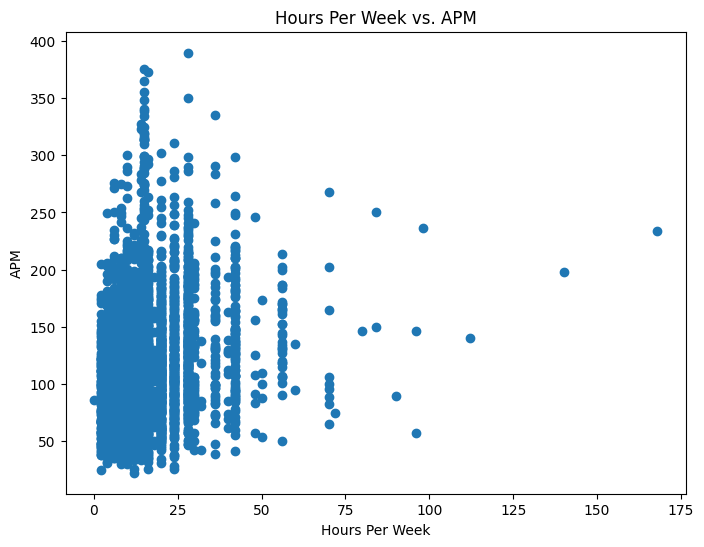

In [127]:
# Hours per week vs APM 
plt.figure(figsize=(8, 6))
plt.scatter(data1['HoursPerWeek'], data1['APM'])
plt.xlabel('Hours Per Week')
plt.ylabel('APM')
plt.title('Hours Per Week vs. APM')
plt.show()

In [19]:
data1['TotalHours']

0       3000
1       5000
2        200
3        400
4        500
        ... 
3390     960
3391     960
3392     960
3393     960
3394     960
Name: TotalHours, Length: 3395, dtype: int64

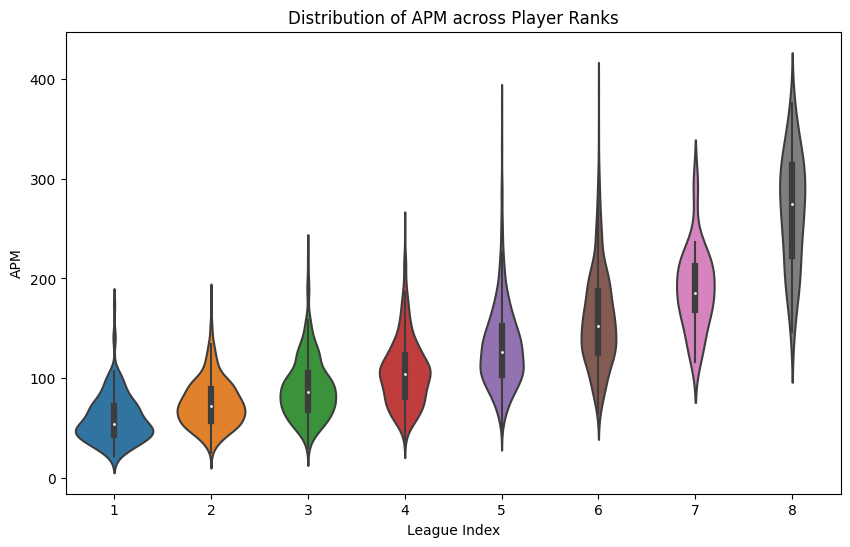

In [128]:
# APM vs League Index
plt.figure(figsize=(10, 6))
sns.violinplot(x='LeagueIndex', y='APM', data=data1)
plt.xlabel('League Index')
plt.ylabel('APM')
plt.title('Distribution of APM across Player Ranks')
plt.show()

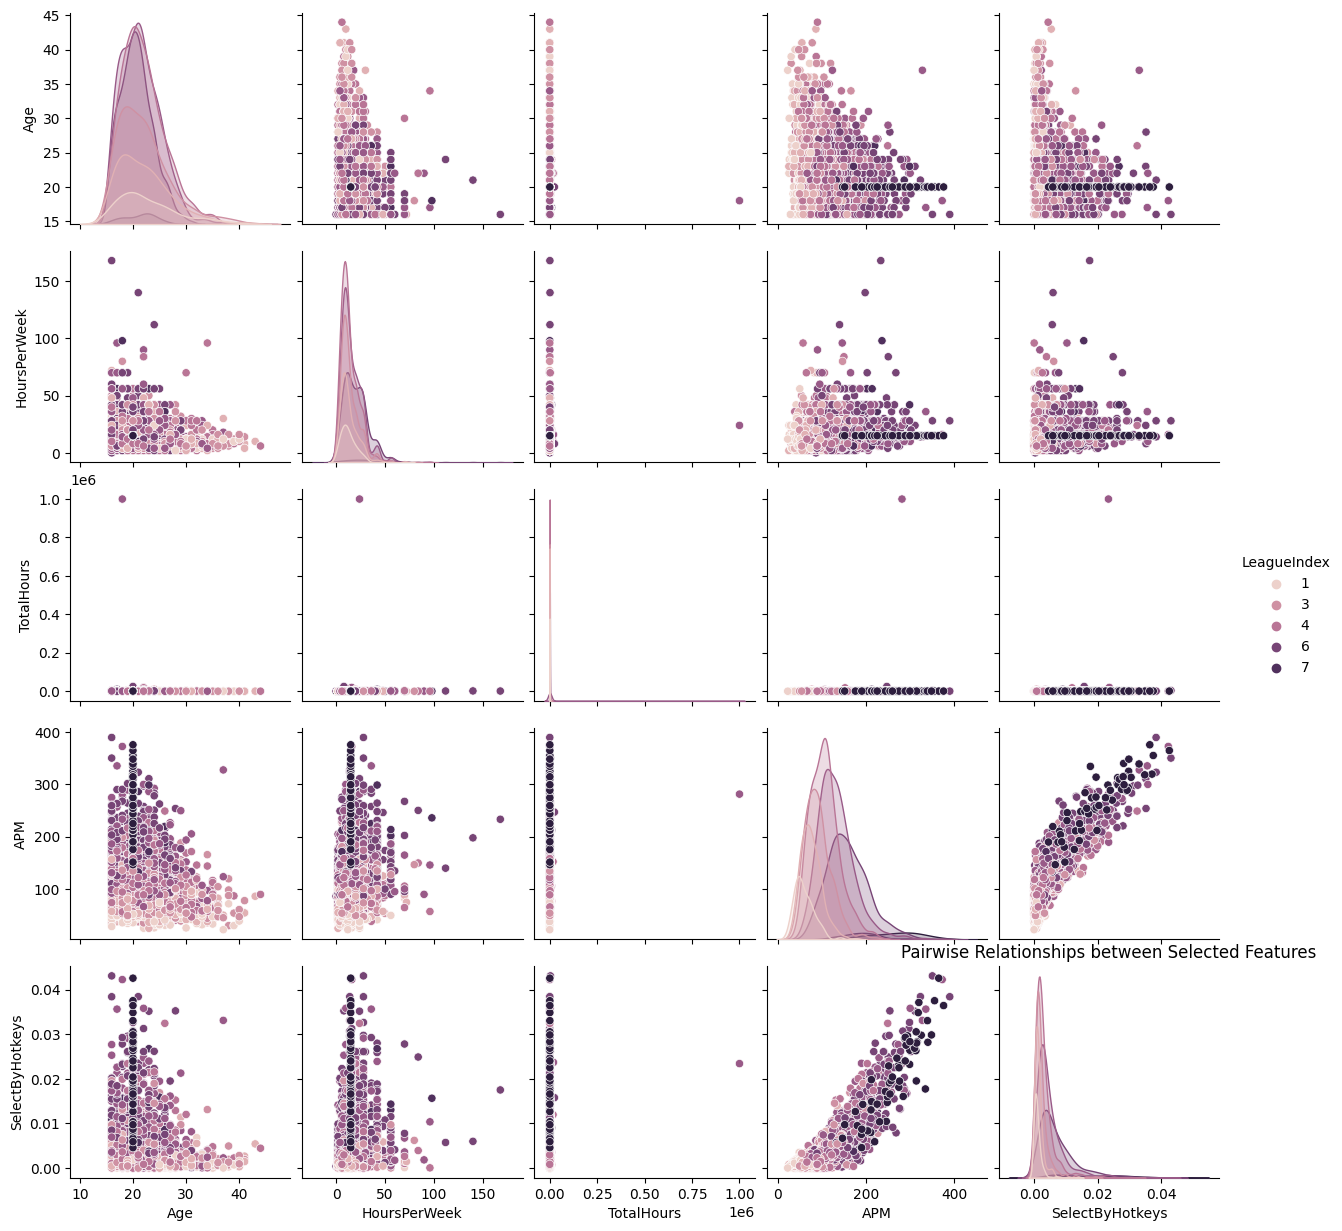

In [129]:
# plotting pairwise relations
columns = ['Age', 'HoursPerWeek', 'TotalHours', 'APM', 'SelectByHotkeys']
sns.pairplot(data=data1, vars=columns, hue='LeagueIndex')
plt.title('Pairwise Relationships between Selected Features')
plt.show()

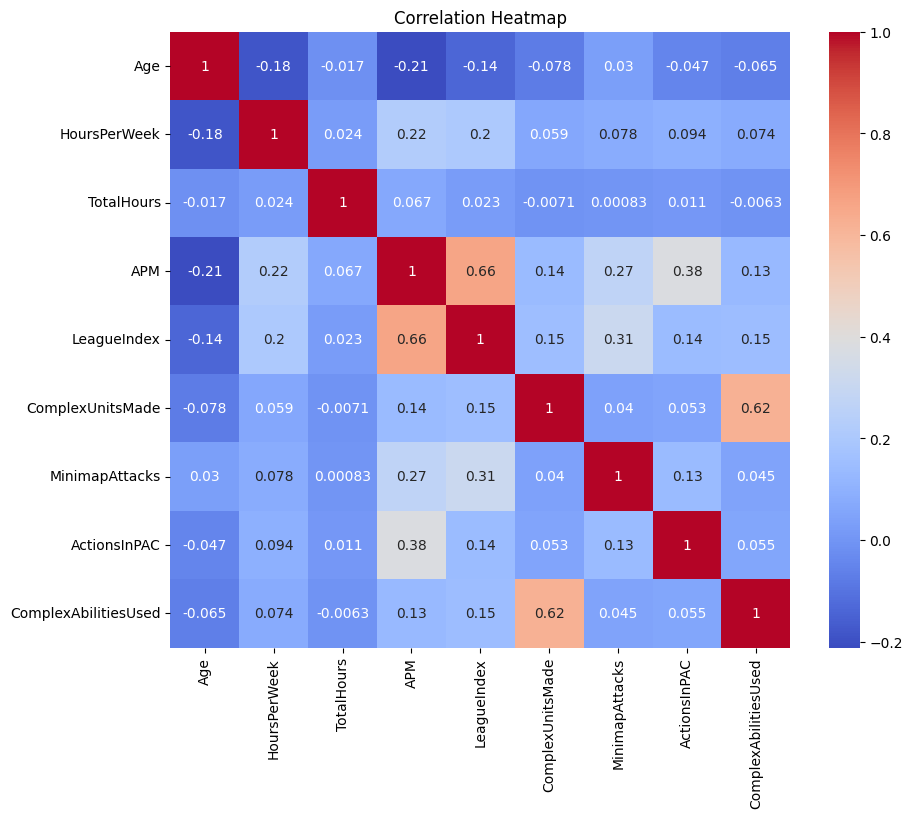

In [130]:
# plotting heatmap to explain the correlation between two variables
plt.figure(figsize=(10, 8))
correlation_matrix = data1[['Age', 'HoursPerWeek', 'TotalHours', 'APM', 'LeagueIndex', 'ComplexUnitsMade','MinimapAttacks','ActionsInPAC','ComplexAbilitiesUsed']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

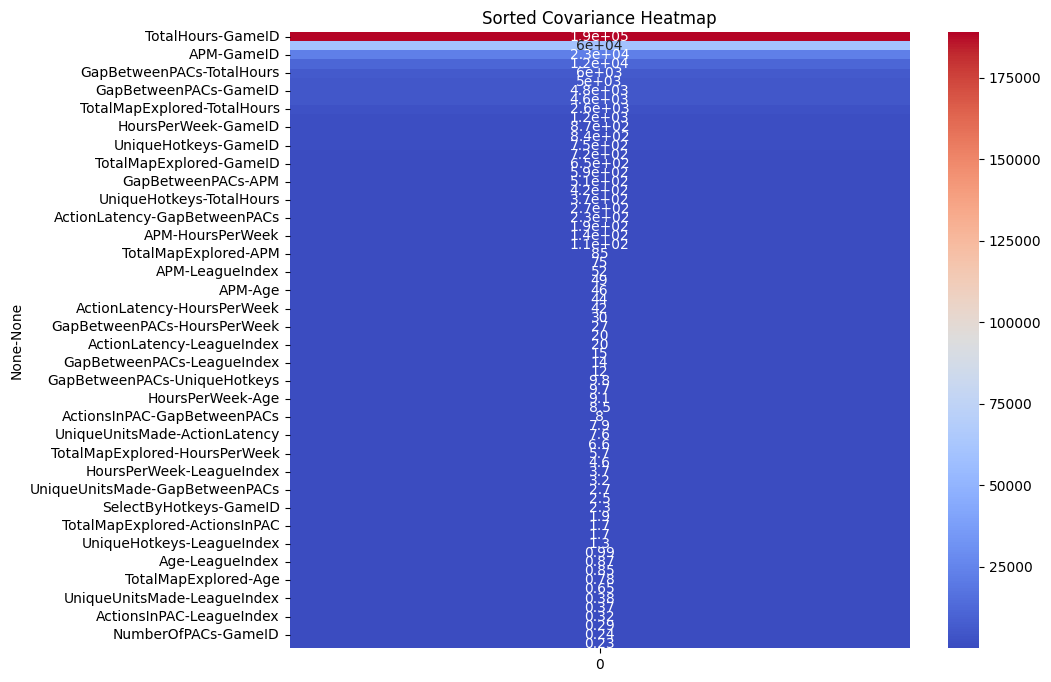

In [132]:
# Plotting covariance plot using covariance matrix
cov_matrix = data1.cov()

threshold = 0.2
filtered_cov_matrix = cov_matrix.abs().where(np.triu(np.ones(cov_matrix.shape), k=1).astype(bool))
filtered_cov_matrix = filtered_cov_matrix.mask(filtered_cov_matrix < threshold)

sorted_cov_matrix = filtered_cov_matrix.unstack().sort_values(ascending=False).dropna()

plt.figure(figsize=(10, 8))
sns.heatmap(sorted_cov_matrix.to_frame(), annot=True, cmap='coolwarm')
plt.title('Sorted Covariance Heatmap')
plt.show()

# MODELING

In [157]:
# Splitting the data into features and target variable
X = data1.drop(['LeagueIndex'], axis=1)  
y = data1['LeagueIndex']  

In [158]:
X.shape

(3395, 19)

In [159]:
# splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [160]:
# code to handle the imbalance between values of columns
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_resampled, y_train_resampled)

In [161]:
# Fitting Random Forest with resampled data
rf_model = RandomForestClassifier()
rf_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier()

In [162]:
# testing the model accuracy on test data
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.39322533136966126


In [163]:
# Scaling the data to ensure that all features have a similar scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [164]:
X_train.shape

(2716, 19)

In [166]:
# Fitting a Logistic Regression model
model1 = LogisticRegression()
model1.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [167]:
# Checking the accuracy on scaled data
accuracy = model1.score(X_test_scaled, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.3784977908689249


In [168]:
# Random Forest on scaled data
rf_model1 = RandomForestClassifier()

In [169]:
rf_model1.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [170]:
# Testing the accuracy on test data
y_pred = rf_model1.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.41973490427098675


# FITTING DIFFERENT CLASSIFIERS

In [171]:
# Defining various other models
logistic_regression = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
gradient_boosting = GradientBoostingClassifier()

In [177]:
# Fitting the above models on X, y using cross validation
classifiers = [
    ('Logistic Regression', logistic_regression),
    ('Decision Tree', decision_tree),
    ('Random Forest', random_forest),
    ('Gradient Boosting', gradient_boosting)
]

for name, classifier in classifiers:
    scores = cross_val_score(classifier, X, y, cv=16)  # Perform 16-fold cross-validation
    accuracy = scores.mean()
    print(f'{name}: Accuracy = {accuracy:.4f}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression: Accuracy = 0.3355
Decision Tree: Accuracy = 0.3517
Random Forest: Accuracy = 0.4250
Gradient Boosting: Accuracy = 0.3797


In [178]:
# Fitting Kernel Ridge model
model = KernelRidge(alpha=0.1, kernel='rbf')
model.fit(X_train_scaled, y_train)

KernelRidge(alpha=0.1, kernel='rbf')

In [179]:
y_pred = model.predict(X_test_scaled)

In [150]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.1509295820251646


In [180]:
y_pred_labels = [1 if val >= 0.5 else 0 for val in y_pred]

In [181]:
accuracy = accuracy_score(y_test, y_pred_labels)
print("Accuracy:", accuracy)

Accuracy: 0.045655375552282766


In [183]:
# Fitting RF with different hyperparameters
model_1 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model_2 = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
model_3 = RandomForestClassifier(n_estimators=300, max_depth=15, random_state=42)

In [184]:
# Training each model on the training data
model_1.fit(X_train_scaled, y_train)
model_2.fit(X_train_scaled, y_train)
model_3.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=15, n_estimators=300, random_state=42)

In [185]:
# Making predictions using each model
pred_1 = model_1.predict(X_test_scaled)
pred_2 = model_2.predict(X_test_scaled)
pred_3 = model_3.predict(X_test_scaled)

In [186]:
# Combining predictions using voting (majority voting)
ensemble_pred = pd.DataFrame({'pred_1': pred_1, 'pred_2': pred_2, 'pred_3': pred_3})
ensemble_pred['final_pred'] = ensemble_pred.mode(axis=1)[0]

In [187]:
# Evaluating the accuracy of the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_pred['final_pred'])
print("Ensemble Accuracy:", accuracy)

Ensemble Accuracy: 0.4050073637702504


# FINDINGS & SUGGESTIONS 

1.   The data columns like 'HoursPerWeek', 'TotalHours' and 'Age' contained irregular values.
2.   There was an imbalance in the data. For example: There were around 800 samples for Index 4 whereas some of the Indices only had around 30 samples.
3.   More hours per week didn't necessarily mean more APM.
4.   As the age increased, the actions per minute and Hours per week decreased.
5.   I tried various models by setting different hyperparameters each time and even scaling the input. The best accuracy I could achieve within the 5 hours timeframe was around 43% by Random Forest using cross validation.











# HYPOTHETICAL
Some of the suggestions would be:

1.   Get cleaner data, i.e., data shouldn't contain irregular values.
2.   Collect more data for Indices with lesser samples (There should not be class imbalance).
3.   Collect additional relevant features that may provide more information about the players and their performance.
4.   Collect a lot of data so that the predictions can be better.

